In [1]:
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('BDAS').getOrCreate()

In [2]:
%pprint
df1 = spark.read.csv("/home/ubuntu/Crash_Analysis_System_DataLT.csv", header = True, inferSchema=True)
df2 = spark.read.csv("/home/ubuntu/2 Crash_Analysis_System_DataLT.csv", header = True, inferSchema=True)
df1.columns


Pretty printing has been turned OFF


['X', 'Y', 'OBJECTID', 'advisorySpeed', 'areaUnitID', 'bicycle', 'bridge', 'bus', 'carStationWagon', 'cliffBank', 'crashDirectionDescription', 'crashFinancialYear', 'crashLocation1', 'crashLocation2', 'crashRoadSideRoad', 'crashSeverity', 'crashSHDescription', 'crashYear', 'debris', 'directionRoleDescription', 'ditch', 'fatalCount', 'fence', 'flatHill', 'guardRail', 'holiday', 'houseOrBuilding', 'intersection', 'kerb', 'light', 'meshblockId', 'minorInjuryCount', 'moped', 'motorcycle', 'NumberOfLanes', 'objectThrownOrDropped', 'otherObject', 'otherVehicleType', 'overBank', 'parkedVehicle', 'pedestrian', 'phoneBoxEtc', 'postOrPole', 'region', 'roadCharacter', 'roadLane', 'roadSurface', 'roadworks', 'schoolBus', 'seriousInjuryCount', 'slipOrFlood', 'speedLimit', 'strayAnimal', 'streetLight', 'suv', 'taxi', 'temporarySpeedLimit', 'tlaId', 'tlaName', 'trafficControl', 'trafficIsland', 'trafficSign', 'train', 'tree', 'truck', 'unknownVehicleType', 'urban', 'vanOrUtility', 'vehicle', 'waterRi

In [3]:
print('------Data Frame 1------')
print("Data Entries Amount: ", df1.count())
print("Data columns: ", len(df1.columns))
print("------Data Frame 2------")
print("Data Entries Amount: ", df2.count())
print("Data columns: ", len(df2.columns))
df = df1.union(df2)
print("------Data Frame Appended------")
print("Data Entries Amount: ", df.count())
print("Data columns: ", len(df.columns))

------Data Frame 1------
Data Entries Amount:  1999
Data columns:  72
------Data Frame 2------
Data Entries Amount:  1001
Data columns:  72
------Data Frame Appended------
Data Entries Amount:  3000
Data columns:  72


In [4]:
df1.printSchema()

root
 |-- X: double (nullable = true)
 |-- Y: double (nullable = true)
 |-- OBJECTID: integer (nullable = true)
 |-- advisorySpeed: integer (nullable = true)
 |-- areaUnitID: integer (nullable = true)
 |-- bicycle: integer (nullable = true)
 |-- bridge: integer (nullable = true)
 |-- bus: integer (nullable = true)
 |-- carStationWagon: integer (nullable = true)
 |-- cliffBank: integer (nullable = true)
 |-- crashDirectionDescription: string (nullable = true)
 |-- crashFinancialYear: string (nullable = true)
 |-- crashLocation1: string (nullable = true)
 |-- crashLocation2: string (nullable = true)
 |-- crashRoadSideRoad: integer (nullable = true)
 |-- crashSeverity: string (nullable = true)
 |-- crashSHDescription: string (nullable = true)
 |-- crashYear: integer (nullable = true)
 |-- debris: integer (nullable = true)
 |-- directionRoleDescription: string (nullable = true)
 |-- ditch: integer (nullable = true)
 |-- fatalCount: integer (nullable = true)
 |-- fence: integer (nullable = 

In [5]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

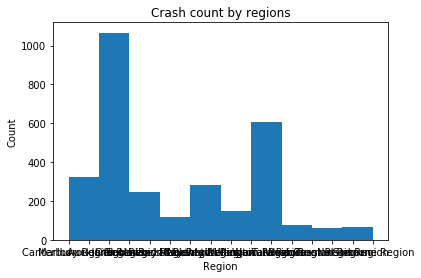

In [6]:
#Crash count by regions
Arr = np.array(df.select('region').collect())
fig, ax = plt.subplots()
ax.set_title('Crash count by regions')
ax.set_xlabel('Region')
ax.set_ylabel('Count')
plt.hist(Arr)
plt.show()

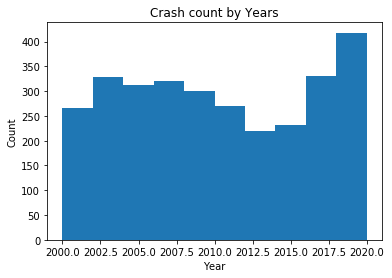

In [7]:
#Crash count by years
Arr = np.array(df.select('crashYear').collect())
fig, ax = plt.subplots()
ax.set_title('Crash count by Years')
ax.set_xlabel('Year')
ax.set_ylabel('Count')
plt.hist(Arr)
plt.show()

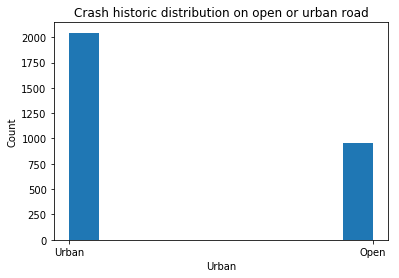

In [8]:
#Crash historic distribution on open or urban road
Arr = np.array(df.select('urban').collect())
fig, ax = plt.subplots()
ax.set_title('Crash historic distribution on open or urban road')
ax.set_xlabel('Urban')
ax.set_ylabel('Count')
plt.hist(Arr)
plt.show()

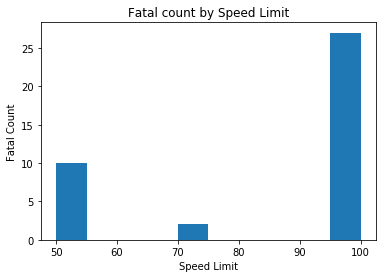

In [9]:
#Fatal Count
Arr = np.array(df.filter('fatalCount > 0').select('speedLimit').collect())
fig, ax = plt.subplots()
ax.set_title('Fatal count by Speed Limit')
ax.set_xlabel('Speed Limit')
ax.set_ylabel('Fatal Count')
plt.hist(Arr)
plt.show()

In [10]:
#2.4
df.describe().show()

+-------+------------------+-----------------+------------------+-----------------+-----------------+-------------------+--------------------+-------------------+------------------+-------------------+-------------------------+------------------+---------------+---------------+-----------------+-------------+------------------+------------------+--------------------+------------------------+-------------------+--------------------+-------------------+--------+--------------------+------------------+--------------------+------------------+-------------------+----------+------------------+------------------+-------------------+-------------------+------------------+---------------------+-------------------+--------------------+--------------------+-------------------+-------------------+--------------------+-------------------+-----------------+-------------+--------+-----------+--------------------+--------------------+-------------------+--------------------+------------------+--------

In [11]:
#3.1
df = df1.union(df2)
print("Data Entries Amount Before Selection: ", df.count())
df = df.filter("crashSeverity == 'Serious Crash' or crashSeverity == 'Fatal Crash' or crashSeverity == 'Minor Crash'")
print("Data Entries Amount After Selection: ", df.count())

Data Entries Amount Before Selection:  3000
Data Entries Amount After Selection:  894


In [12]:
print("Before: Data columns (total", len(df.columns),"columns)")
df = df.drop('areaUnitID','crashFinancialYear','crashRoadSideRoad','intersection','tlaId','tlaName')
print("After: Data columns (total", len(df.columns),"columns)")

Before: Data columns (total 72 columns)
After: Data columns (total 66 columns)


In [13]:
#3.2
df = df.na.fill(value='Null',subset=['holiday'])
df_dtypes = dict(df.dtypes)
for column in df.columns:
    if df_dtypes[column] != 'string':
        df = df.na.fill(value=0,subset=[column])
    else:
        df = df.na.drop(subset=[column])

from pyspark.sql.functions import col,sum
df.select(*(sum(col(c).isNull().cast("int")).alias(c) for c in df.columns)).show()

df.describe().show()

+---+---+--------+-------------+-------+------+---+---------------+---------+-------------------------+--------------+--------------+-------------+------------------+---------+------+------------------------+-----+----------+-----+--------+---------+-------+---------------+----+-----+-----------+----------------+-----+----------+-------------+---------------------+-----------+----------------+--------+-------------+----------+-----------+----------+------+-------------+--------+-----------+---------+---------+------------------+-----------+----------+-----------+-----------+---+----+-------------------+--------------+-------------+-----------+-----+----+-----+------------------+-----+------------+-------+----------+--------+--------+
|  X|  Y|OBJECTID|advisorySpeed|bicycle|bridge|bus|carStationWagon|cliffBank|crashDirectionDescription|crashLocation1|crashLocation2|crashSeverity|crashSHDescription|crashYear|debris|directionRoleDescription|ditch|fatalCount|fence|flatHill|guardRail|holida

In [14]:
#3.3
from pyspark.sql.functions import when
from pyspark.sql.functions import lit

df = df.withColumn("windy", \
   when((df.weatherB.isNull()), lit(0)).otherwise(lit(1))
  )
df = df.withColumn("raining", \
   when((df.weatherA == 'Fine'), lit(0)).otherwise(lit(1))
  )
df = df.drop('weatherA', 'weatherB')
df.printSchema()


root
 |-- X: double (nullable = false)
 |-- Y: double (nullable = false)
 |-- OBJECTID: integer (nullable = true)
 |-- advisorySpeed: integer (nullable = true)
 |-- bicycle: integer (nullable = true)
 |-- bridge: integer (nullable = true)
 |-- bus: integer (nullable = true)
 |-- carStationWagon: integer (nullable = true)
 |-- cliffBank: integer (nullable = true)
 |-- crashDirectionDescription: string (nullable = true)
 |-- crashLocation1: string (nullable = true)
 |-- crashLocation2: string (nullable = true)
 |-- crashSeverity: string (nullable = true)
 |-- crashSHDescription: string (nullable = true)
 |-- crashYear: integer (nullable = true)
 |-- debris: integer (nullable = true)
 |-- directionRoleDescription: string (nullable = true)
 |-- ditch: integer (nullable = true)
 |-- fatalCount: integer (nullable = true)
 |-- fence: integer (nullable = true)
 |-- flatHill: string (nullable = true)
 |-- guardRail: integer (nullable = true)
 |-- holiday: string (nullable = false)
 |-- houseOrB

In [15]:
#3.5
import pandas as pd


#data_types = pd.DataFrame(df.toPandas().dtypes, columns=['Data Type'])
#print(data_types)

df = df.withColumn("holiday", \
   when((df.holiday == 'Null'), lit(0)).otherwise(lit(1)))
df = df.withColumn("holiday",df.holiday.cast('int'))

df = df.withColumn("urban", \
   when((df.urban == 'Urban'), lit(1)).otherwise(lit(0)))
df = df.withColumn("urban",df.urban.cast('int'))

df = df.withColumn("flatHill", \
   when((df.flatHill == 'Flat'), lit(0)).otherwise(lit(1)))
df = df.withColumn("flatHill",df.flatHill.cast('int'))
df = df.withColumnRenamed("flatHill","hill")

df = df.withColumn("roadSurface", \
   when((df.roadSurface == 'Sealed'), lit(1)).otherwise(lit(0)))
df = df.withColumn("roadSurface",df.roadSurface.cast('int'))
df = df.withColumnRenamed("roadSurface","sealedRoad")

df = df.withColumn("crashSHDescription", \
   when((df.crashSHDescription == 'Yes'), lit(1)).otherwise(lit(0)))
df = df.withColumn("crashSHDescription",df.crashSHDescription.cast('int'))
df = df.withColumnRenamed("crashSHDescription","highwayCrash")

#df.show()
df.printSchema()



root
 |-- X: double (nullable = false)
 |-- Y: double (nullable = false)
 |-- OBJECTID: integer (nullable = true)
 |-- advisorySpeed: integer (nullable = true)
 |-- bicycle: integer (nullable = true)
 |-- bridge: integer (nullable = true)
 |-- bus: integer (nullable = true)
 |-- carStationWagon: integer (nullable = true)
 |-- cliffBank: integer (nullable = true)
 |-- crashDirectionDescription: string (nullable = true)
 |-- crashLocation1: string (nullable = true)
 |-- crashLocation2: string (nullable = true)
 |-- crashSeverity: string (nullable = true)
 |-- highwayCrash: integer (nullable = false)
 |-- crashYear: integer (nullable = true)
 |-- debris: integer (nullable = true)
 |-- directionRoleDescription: string (nullable = true)
 |-- ditch: integer (nullable = true)
 |-- fatalCount: integer (nullable = true)
 |-- fence: integer (nullable = true)
 |-- hill: integer (nullable = false)
 |-- guardRail: integer (nullable = true)
 |-- holiday: integer (nullable = false)
 |-- houseOrBuildi

/usr/lib/python3/dist-packages/sklearn/feature_selection/univariate_selection.py:165: RuntimeWarning: invalid value encountered in true_divide
  chisq /= f_exp


                  Specs       Score
30           speedLimit  248.182350
34  temporarySpeedLimit   64.524129
39                truck   16.799158
21             overBank   13.636966
0         advisorySpeed   12.322302
6          highwayCrash   12.244574
41                urban   10.675380
16           motorcycle    8.737659
38                 tree    8.627620
11            guardRail    7.780526
4       carStationWagon    4.768025
32                  suv    4.491158
7                debris    4.350585
40   unknownVehicleType    4.258824
23           pedestrian    3.429204


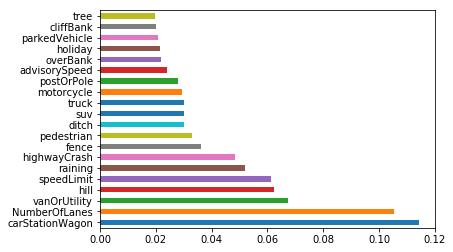

In [16]:
#4.1 Data Reduction 

#print("Data columns: ", len(df.columns))
import sklearn

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2 
df82 = df
df_41 = df.drop('x','y','meshblockId','minorInjuryCount','seriousInjuryCount','fatalCount','OBJECTID','crashYear')
df_41 = df_41.toPandas()
df_41n = df_41.select_dtypes(include='number')
#df_41.info()

X = df_41n   #independent columns
y = df_41.iloc[:,9]    #target column
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] #naming the dataframe columns
print(featureScores.nlargest(15,'Score')) #print 35 best features



from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()


Before Balanced:
Minor Crash      685
Serious Crash    170
Fatal Crash       39
Name: crashSeverity, dtype: int64


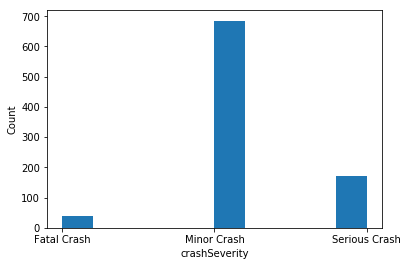

After Balanced:
Fatal Crash      1023
Serious Crash    1006
Minor Crash      1003
Name: crashSeverity, dtype: int64


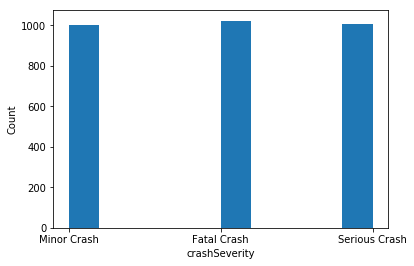

In [17]:
from pyspark.sql.functions import col
df = df.select('speedLimit','highwayCrash','carStationWagon','urban',\
               'truck','hill','holiday','tree','overBank','motorcycle',\
               'pedestrian','vanOrUtility','NumberOfLanes','raining','crashSeverity')

print('Before Balanced:')
print(df.toPandas()['crashSeverity'].value_counts())
Arr = np.array(df.select('crashSeverity').collect())
fig, ax = plt.subplots()
ax.set_xlabel('crashSeverity')
ax.set_ylabel('Count')
plt.hist(Arr)
plt.show()
df_c=df
def upsample_1000(df):
    major_df = df.filter(col("crashSeverity") == 'Minor Crash')
    middle_df = df.filter(col("crashSeverity") == 'Serious Crash')
    minor_df = df.filter(col("crashSeverity") == 'Fatal Crash')
    major_df = major_df.sample(True, 1000/major_df.count(), 123)
    middle_df = middle_df.sample(True, 1000/middle_df.count(), 123)
    minor_df = minor_df.sample(True, 1000/minor_df.count(), 123)
    return major_df.union(minor_df).union(middle_df)

df = upsample_1000(df)
df82 = upsample_1000(df82)

print('After Balanced:')
print(df.toPandas()['crashSeverity'].value_counts())
Arr = np.array(df.select('crashSeverity').collect())
fig, ax = plt.subplots()
ax.set_xlabel('crashSeverity')
ax.set_ylabel('Count')
plt.hist(Arr)
plt.show()

In [18]:
df_backup = df
#df.write.csv('ProcessedData.csv')
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StringIndexer
df.columns
assembler = VectorAssembler(inputCols=['speedLimit','highwayCrash','carStationWagon','urban',\
               'truck','hill','holiday','tree','overBank','motorcycle',\
               'pedestrian','vanOrUtility','NumberOfLanes','raining'], outputCol='features')
output = assembler.transform(df)
indexer = StringIndexer(inputCol="crashSeverity", outputCol="crashSeverityIndex")
output_fixed = indexer.fit(output).transform(output)
final_data = output_fixed.select("features",'crashSeverityIndex')
train_data,test_data = final_data.randomSplit([0.7,0.3])

In [19]:
from pyspark.ml import Pipeline
#Validation
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
acc_evaluator = MulticlassClassificationEvaluator(labelCol="crashSeverityIndex", predictionCol="prediction", metricName="accuracy")
from pyspark.ml.evaluation import BinaryClassificationEvaluator
my_binary_eval = BinaryClassificationEvaluator(labelCol = 'crashSeverityIndex')


#ANN
from pyspark.ml.classification import MultilayerPerceptronClassifier
layers = [14, 14, 14, 3]
ann = MultilayerPerceptronClassifier(labelCol="crashSeverityIndex",maxIter=100, layers=layers, blockSize=32, seed=123)
ann_model = ann.fit(train_data)
ann_predictions = ann_model.transform(test_data)

ann_acc = acc_evaluator.evaluate(ann_predictions)

#ann_predictions.select(['crashSeverityIndex','prediction', 'probability']).show()
print('An Artificial Neural Network has an accuracy of: {0:2.2f}%'.format(ann_acc*100))


#print("ANN")
#evaluator = BinaryClassificationEvaluator(labelCol='crashSeverityIndex', metricName='areaUnderROC')
#print(evaluator.evaluate(ann_predictions))
from sklearn.metrics import classification_report, confusion_matrix
y_true = ann_predictions.select('crashSeverityIndex').collect()
y_pred = ann_predictions.select('prediction').collect()

#print(classification_report(y_true, y_pred))
print(confusion_matrix(y_true, y_pred))
print('-'*40)
#DTC
from pyspark.ml.classification import (DecisionTreeClassifier)
dtc = DecisionTreeClassifier(labelCol='crashSeverityIndex',featuresCol='features')
dtc_model = dtc.fit(train_data)
dtc_predictions = dtc_model.transform(test_data)

dtc_acc = acc_evaluator.evaluate(dtc_predictions)
print('A single decision tree has an accuracy of: {0:2.2f}%'.format(dtc_acc*100))
print('-'*40)
dtc_predictions.select(['crashSeverityIndex','prediction', 'probability']).show()
print('-'*40)

print("DTC Binary Evaluate:")
print(my_binary_eval.evaluate(dtc_predictions))
print('-'*40)
#RFC
from pyspark.ml.classification import RandomForestClassifier
rfc = RandomForestClassifier(labelCol='crashSeverityIndex',featuresCol='features')
rfc_model = rfc.fit(train_data)
rfc_predictions = rfc_model.transform(test_data)

rfc_acc = acc_evaluator.evaluate(rfc_predictions)

print('A random forest ensemble has an accuracy of: {0:2.2f}%'.format(rfc_acc*100))
print('-'*40)
rfc_predictions.select(['crashSeverityIndex','prediction', 'probability']).show()
print('-'*40)

print("RFC")
print(my_binary_eval.evaluate(rfc_predictions))

An Artificial Neural Network has an accuracy of: 51.33%
[[255  29  39]
 [125  33 126]
 [ 82  37 174]]
----------------------------------------
A single decision tree has an accuracy of: 58.22%
----------------------------------------
+------------------+----------+--------------------+
|crashSeverityIndex|prediction|         probability|
+------------------+----------+--------------------+
|               2.0|       0.0|[0.46666666666666...|
|               2.0|       2.0|[0.09431137724550...|
|               2.0|       2.0|[0.09431137724550...|
|               2.0|       0.0|[0.72992700729927...|
|               2.0|       1.0|[0.0,0.6454545454...|
|               2.0|       1.0|[0.0,0.6454545454...|
|               2.0|       0.0|[0.37082066869300...|
|               2.0|       0.0|[0.37082066869300...|
|               2.0|       0.0|[0.84117647058823...|
|               2.0|       2.0|       [0.0,0.0,1.0]|
|               2.0|       0.0|[0.37082066869300...|
|               2.0|    

In [20]:
print(dtc_model.toDebugString)

DecisionTreeClassificationModel (uid=DecisionTreeClassifier_4f6aaa6b0f55a8a29d7b) of depth 5 with 53 nodes
  If (feature 0 <= 80.0)
   If (feature 0 <= 60.0)
    If (feature 9 <= 0.0)
     If (feature 7 <= 0.0)
      If (feature 4 <= 0.0)
       Predict: 2.0
      Else (feature 4 > 0.0)
       Predict: 0.0
     Else (feature 7 > 0.0)
      If (feature 2 <= 1.0)
       Predict: 1.0
      Else (feature 2 > 1.0)
       Predict: 0.0
    Else (feature 9 > 0.0)
     If (feature 1 <= 0.0)
      If (feature 13 <= 0.0)
       Predict: 1.0
      Else (feature 13 > 0.0)
       Predict: 0.0
     Else (feature 1 > 0.0)
      If (feature 5 <= 0.0)
       Predict: 1.0
      Else (feature 5 > 0.0)
       Predict: 0.0
   Else (feature 0 > 60.0)
    If (feature 10 <= 0.0)
     If (feature 2 <= 0.0)
      Predict: 2.0
     Else (feature 2 > 0.0)
      If (feature 8 <= 0.0)
       Predict: 1.0
      Else (feature 8 > 0.0)
       Predict: 1.0
    Else (feature 10 > 0.0)
     If (feature 4 <= 0.0)
      If 

In [21]:
def csv_download_link(df, csv_file_name, delete_prompt=True):
    """Display a download link to load a data frame as csv from within a Jupyter notebook"""
    df.toPandas().to_csv(csv_file_name, index=False)
    from IPython.display import FileLink
    display(FileLink(csv_file_name))
    if delete_prompt:
        a = input('Press enter to delete the file after you have downloaded it.')
        import os
        os.remove(csv_file_name)
        
df_origin = df1.union(df2)
#csv_download_link(df_origin, 'df_o.csv')

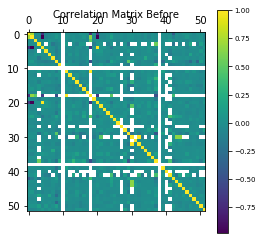

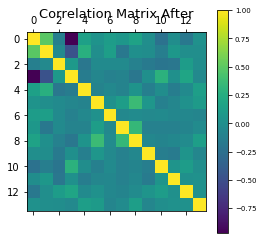

In [22]:
plt.matshow(df_origin.toPandas().corr())
plt.title('Correlation Matrix Before', fontsize=10);
cb = plt.colorbar()
cb.ax.tick_params(labelsize=7)
plt.show()

plt.matshow(df.toPandas().corr())
plt.title('Correlation Matrix After', fontsize=13);
cb = plt.colorbar()
cb.ax.tick_params(labelsize=7)
plt.show()

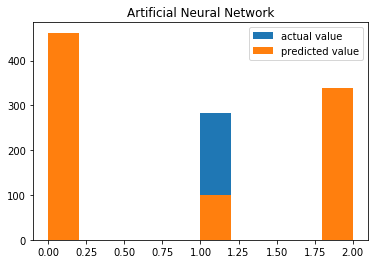

In [23]:
predictionArray = np.array(ann_predictions.select('prediction').collect())
actualArray = np.array(ann_predictions.select('crashSeverityIndex').collect())
plt.hist(actualArray, label="actual value")
plt.hist(predictionArray, label="predicted value")

plt.title("Artificial Neural Network")
plt.legend(loc='upper right')
plt.show()

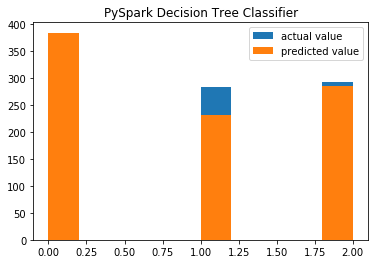

In [24]:
predictionArray = np.array(dtc_predictions.select('prediction').collect())
actualArray = np.array(dtc_predictions.select('crashSeverityIndex').collect())
plt.hist(actualArray, label="actual value")
plt.hist(predictionArray, label="predicted value")

plt.title("PySpark Decision Tree Classifier")
plt.legend(loc='upper right')
plt.show()

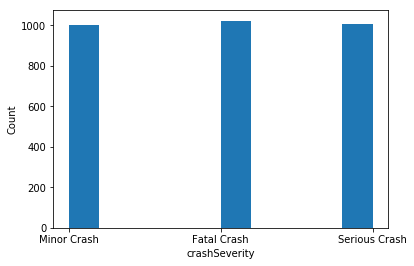

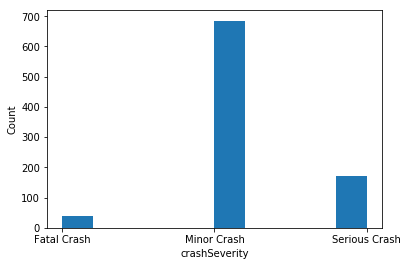

In [25]:
Arr = np.array(df.select('crashSeverity').collect())
fig, ax = plt.subplots()
ax.set_xlabel('crashSeverity')
ax.set_ylabel('Count')
plt.hist(Arr)
plt.show()

Arr = np.array(df_c.select('crashSeverity').collect())
fig, ax = plt.subplots()
ax.set_xlabel('crashSeverity')
ax.set_ylabel('Count')
plt.hist(Arr)
plt.show()